In [1]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [186]:
# read in all our data
#tmt = pd.read_csv("Datasets/Treatment_Follow_Up.csv", dtype={'when_child_died': str, 'where_child_died': str}) #, low_memory=False)
pt = pd.read_csv("Datasets/Patient-Table.csv")
#ref = pd.read_csv("Datasets/Referral_Follow_Up-table.csv")
followup = pd.read_csv("Datasets/Follow_Up_Consolidated.csv")

C:\Users\sudha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [224]:
tmt = pd.read_csv("Treatment_Follow_Up-Table.csv")

C:\Users\sudha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pt_case = pd.read_csv("Datasets/Patient_Case-Table.csv")

In [6]:
pt_case.describe()

,count_treatment_follow_ups,count_referral_follow_ups
count,55400.000000,55400.000000
mean,0.425289,0.244964
std,0.903159,0.430070
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4.000000,1.000000


In [7]:
pt_case.head()

,case_id,patient_id,chw_id,how_child_found,when_assessed,when_assessed_en,when_illness_began,when_illness_began_en,count_treatment_follow_ups,count_referral_follow_ups,...,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,malaria_without_24h_follow_up,malaria_without_48h_follow_up,malaria_without_72h_follow_up,muac_yellow_no_malnutrition_follow_up,pneumonia_without_amoxicillin,severe_diarrhea_without_referral,symptoms_of_malaria_without_tdr
0,9156B9BD-08CD-59D4-AEB6-9887D79E9CDC,EF6C2A92-B163-FA63-80D4-AE13EDE7A34E,16259fcc-d057-4874-8638-2f89d3ff2f20,home_visit,c_assessment_time_1,Morning,c_when_illness_1,Today,0,0,...,False,False,False,True,True,True,False,False,False,False
1,000264B5-5124-9A3E-9038-EADF76D3DFA5,6D15493C-1DDF-FEAE-9377-9F35F2D5CCF7,c27a0584-b106-469e-b0b7-538b72fd1bb4,home_visit,c_assessment_time_1,Morning,c_when_illness_8,More than three days ago,0,1,...,False,False,False,False,False,False,False,False,False,False
2,A8A160CF-A715-749C-B757-81B5EAD40A3F,bf2e3fc5-418c-4bf9-8905-c342306ae64b,a4119d4c-664e-49cf-a596-aa25981ebf8d,home_visit,c_assessment_time_1,Morning,c_when_illness_8,More than three days ago,0,0,...,False,True,False,False,False,False,False,False,False,False
3,98A68B40-2578-C932-93EB-94DE2735F9BB,7d77152b-5063-4f68-9df8-86cb0b2b2f88,5ba0b402-23c3-405b-90d1-bc776c212e54,home_visit,c_assessment_time_1,Morning,c_when_illness_4,Yesterday morning,1,0,...,False,False,True,False,True,True,False,False,False,False
4,FCC07669-E440-A159-902D-08EF013AF9DC,450425BF-BAD1-CEBE-A6EA-8283FB765047,fda753c1c37ef32fba0138a4c7c33958,home_visit,c_assessment_time_1,Morning,c_when_illness_1,Today,0,0,...,False,False,False,False,False,False,False,False,False,False


In [9]:
pt_case['when_illness_began'].value_counts()
pt_case['when_illness_began_en'].value_counts()

Today                                  12544
Last night                             11426
More than three days ago                9367
Yesterday evening                       6263
Three days ago                          5991
Yesterday morning                       4675
Evening of the day before yesterday     3133
Morning of the day before yesterday     2001
Name: when_illness_began_en, dtype: int64

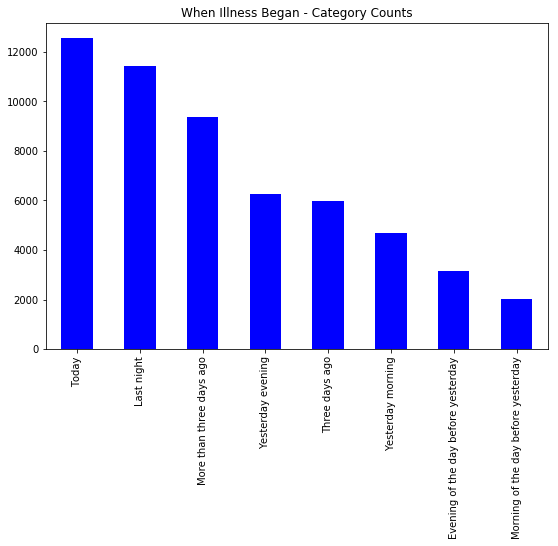

In [10]:
pt_case['when_illness_began_en'].value_counts().plot(kind='bar', 
                                                     rot=90, 
                                                     title = 'When Illness Began - Category Counts',
                                                     figsize=(9, 6),
                                                     color='b')

In [11]:
pt_case.columns

Index(['case_id', 'patient_id', 'chw_id', 'how_child_found', 'when_assessed',
       'when_assessed_en', 'when_illness_began', 'when_illness_began_en',
       'count_treatment_follow_ups', 'count_referral_follow_ups', 'treat_ari',
       'treat_malaria', 'treat_diarrhea', 'accompany_to_cscom',
       'refer_to_cscom', 'has_protocol_errors',
       'act_based_combination_without_positive_tdr',
       'acute_respiratory_infection_without_24h_follow_up',
       'acute_respiratory_infection_without_48h_follow_up',
       'acute_respiratory_infection_without_5_day_follow_up',
       'amoxicillin_without_pneumonia', 'danger_signs_without_referral',
       'diarrhea_without_5day_follow_up', 'diarrhea_without_ors',
       'diarrhea_without_zinc', 'fever_without_tdr',
       'incorrect_dosage_of_act_based_combination',
       'incorrect_dosage_of_albendazole', 'incorrect_dosage_of_amoxicillin',
       'incorrect_dosage_of_paracetamol', 'incorrect_dosage_of_vitamin_a',
       'incorrect_dosage_o

In [12]:
pt_case['treat_ari'].value_counts()

False    44870
True     10530
Name: treat_ari, dtype: int64

In [13]:
protocol_errors = pt_case.groupby('has_protocol_errors', as_index=False).agg({'treat_ari':'sum', 'treat_malaria':'sum', 'treat_diarrhea':'sum'})

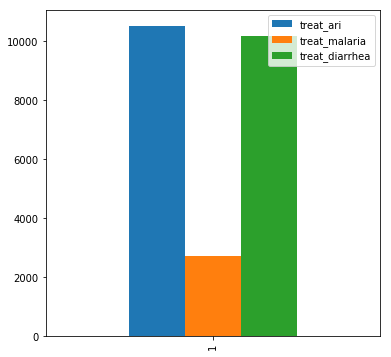

In [14]:
protocol_errors[protocol_errors['has_protocol_errors']==True].plot(kind='bar', figsize=(6,6))

In [15]:
pt_case[(pt_case.has_protocol_errors==True) & (pt_case.treat_malaria==True)]['malaria_without_24h_follow_up'].value_counts() #plot(kind='bar', figsize=(6,6))

False    1769
True      963
Name: malaria_without_24h_follow_up, dtype: int64

In [16]:
pt_case[(pt_case.has_protocol_errors==True) & (pt_case.treat_malaria==True)]['malaria_without_48h_follow_up'].value_counts()

True     2478
False     254
Name: malaria_without_48h_follow_up, dtype: int64

In [17]:
pt_case[(pt_case.has_protocol_errors==True) & (pt_case.treat_malaria==True)]['malaria_without_72h_follow_up'].value_counts()

True     2638
False      94
Name: malaria_without_72h_follow_up, dtype: int64

In [18]:
col = ['treat_ari',
       #'treat_malaria', 'treat_diarrhea', 
       #'accompany_to_cscom',
       #'refer_to_cscom', 'has_protocol_errors',
       #'act_based_combination_without_positive_tdr',
       'acute_respiratory_infection_without_24h_follow_up',
       'acute_respiratory_infection_without_48h_follow_up',
       'acute_respiratory_infection_without_5_day_follow_up',
       'amoxicillin_without_pneumonia', 'danger_signs_without_referral',
       #'diarrhea_without_5day_follow_up', 'diarrhea_without_ors',
       #'diarrhea_without_zinc', 'fever_without_tdr',
       'incorrect_dosage_of_act_based_combination',
       'incorrect_dosage_of_albendazole', 'incorrect_dosage_of_amoxicillin',
       'incorrect_dosage_of_paracetamol', 'incorrect_dosage_of_vitamin_a',
       'incorrect_dosage_of_zinc', 
       #'malaria_without_24h_follow_up',
       #'malaria_without_48h_follow_up', 'malaria_without_72h_follow_up',
       #'muac_yellow_no_malnutrition_follow_up',
       'pneumonia_without_amoxicillin']
       #'severe_diarrhea_without_referral',
       #'symptoms_of_malaria_without_tdr']
sub = pt_case[col]

In [19]:
sub[sub['treat_ari'] == True].apply(pd.Series.value_counts)

,treat_ari,acute_respiratory_infection_without_24h_follow_up,acute_respiratory_infection_without_48h_follow_up,acute_respiratory_infection_without_5_day_follow_up,amoxicillin_without_pneumonia,danger_signs_without_referral,incorrect_dosage_of_act_based_combination,incorrect_dosage_of_albendazole,incorrect_dosage_of_amoxicillin,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,pneumonia_without_amoxicillin
False,NaN,5159,1200,572,10530.0,10530.0,9934,10349,9867,10353,10458,8948,10231
True,10530.0,5371,9330,9958,NaN,NaN,596,181,663,177,72,1582,299


In [20]:
sub.apply(pd.Series.value_counts)  #.plot(kind='bar')

,treat_ari,acute_respiratory_infection_without_24h_follow_up,acute_respiratory_infection_without_48h_follow_up,acute_respiratory_infection_without_5_day_follow_up,amoxicillin_without_pneumonia,danger_signs_without_referral,incorrect_dosage_of_act_based_combination,incorrect_dosage_of_albendazole,incorrect_dosage_of_amoxicillin,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,pneumonia_without_amoxicillin
False,44870,50029,46070,45442,55400.0,52331,51148,54478,54737,54453,55000,46235,55101
True,10530,5371,9330,9958,NaN,3069,4252,922,663,947,400,9165,299


In [164]:
followup.head()

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
0,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,1,0082AC03-2A2A-866D-9302-528D81810D73,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-03 17:07:27.662+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
1,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2,236022FB-250D-84F0-9C1E-77C0ED6D6968,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-04 15:22:42.808+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
2,000264B5-5124-9A3E-9038-EADF76D3DFA5,referral,1,16BAE18F-EE00-F97E-9E63-59165099F8A2,c27a0584-b106-469e-b0b7-538b72fd1bb4,0beaced5-f358-4412-a644-5c9d67b2df23,6D15493C-1DDF-FEAE-9377-9F35F2D5CCF7,2017-09-25 22:36:03.615+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
3,0004222F-9D90-36F5-9497-0A376ACCDB40,referral,1,99C84433-5C20-F545-B55F-5A9383A59567,16259fcc-d057-4874-8638-2f89d3ff2f20,dbc49be5-d79f-4a01-a97a-fbee9e2af68e,255D4EEE-CE48-8196-B07C-7BB9D9E6D470,2017-10-06 17:49:08.757+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
4,000544E1-8A89-1A96-8C34-5A1A33B9220D,referral,1,101C254E-BDBD-880E-B3C8-E1EE4916C321,fda753c1c37ef32fba0138a4c7c0b6b4,2ed86979-5eba-45e4-b826-e63efed9c6a9,46FFCF88-1EC0-D460-A17C-D01DC860B0FD,2017-09-26 22:19:52.278+00,no_change,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up


In [165]:
followup.describe()

,event_number,tfu_under_observation,tfu_child_temperature,tfu_child_temperature_retake,tfu_respiration_rate,tfu_follow_up_count
count,67194.000000,0.0,25230.000000,408.000000,17228.000000,25235.000000
mean,1.965771,NaN,36.841505,37.105392,40.561412,2.029364
std,1.345351,NaN,1.089153,6.693605,10.127263,1.129543
min,1.000000,NaN,0.500000,0.000000,0.000000,1.000000
25%,1.000000,NaN,36.500000,35.000000,37.000000,1.000000
50%,2.000000,NaN,36.900000,36.000000,40.000000,2.000000
75%,3.000000,NaN,37.200000,37.000000,45.000000,3.000000
max,51.000000,NaN,50.500000,50.000000,635.000000,4.000000


In [166]:
print(pt['sex'].value_counts())

Femme         49382
Homme         47599
femme         45524
homme         29421
1                 9
2                 9
Fils/Fille        3
Name: sex, dtype: int64


In [167]:
print("Follow-up-type: \n", followup['tfu_follow_up_type'].value_counts())
print("\nEvent-type: \n", followup['event_type'].value_counts())
print("\nDisease Progress: \n", followup['how_disease_progressing'].value_counts())
followup.head()

Follow-up-type: 
 ari         14633
referral     6776
malaria      2889
multiple      937
Name: tfu_follow_up_type, dtype: int64

Event-type: 
 referral     41959
treatment    25235
Name: event_type, dtype: int64

Disease Progress: 
 improved      39919
cured         20799
no_change       671
aggravated      184
Name: how_disease_progressing, dtype: int64


,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
0,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,1,0082AC03-2A2A-866D-9302-528D81810D73,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-03 17:07:27.662+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
1,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2,236022FB-250D-84F0-9C1E-77C0ED6D6968,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-04 15:22:42.808+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
2,000264B5-5124-9A3E-9038-EADF76D3DFA5,referral,1,16BAE18F-EE00-F97E-9E63-59165099F8A2,c27a0584-b106-469e-b0b7-538b72fd1bb4,0beaced5-f358-4412-a644-5c9d67b2df23,6D15493C-1DDF-FEAE-9377-9F35F2D5CCF7,2017-09-25 22:36:03.615+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
3,0004222F-9D90-36F5-9497-0A376ACCDB40,referral,1,99C84433-5C20-F545-B55F-5A9383A59567,16259fcc-d057-4874-8638-2f89d3ff2f20,dbc49be5-d79f-4a01-a97a-fbee9e2af68e,255D4EEE-CE48-8196-B07C-7BB9D9E6D470,2017-10-06 17:49:08.757+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
4,000544E1-8A89-1A96-8C34-5A1A33B9220D,referral,1,101C254E-BDBD-880E-B3C8-E1EE4916C321,fda753c1c37ef32fba0138a4c7c0b6b4,2ed86979-5eba-45e4-b826-e63efed9c6a9,46FFCF88-1EC0-D460-A17C-D01DC860B0FD,2017-09-26 22:19:52.278+00,no_change,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up


In [168]:
followup.columns

Index(['case_id', 'event_type', 'event_number', 'event_id', 'chw_id',
       'chw_parent_id', 'patient_id', 'reported', 'how_disease_progressing',
       'new_danger_sign', 'close_out', 'why_close_out', 'when_child_died',
       'where_child_died', 'tfu_task_to_perform', 'tfu_treat_for_diarrhea',
       'tfu_treat_for_malaria', 'tfu_treat_for_ari', 'tfu_under_observation',
       'tfu_child_temperature', 'tfu_child_temperature_retake',
       'tfu_respiration_rate', 'tfu_child_taking_act', 'tfu_child_morning_act',
       'tfu_child_evening_act', 'tfu_act_not_given', 'tfu_child_taking_amox',
       'tfu_amox_not_given', 'tfu_child_taking_zinc', 'tfu_zinc_not_given',
       'tfu_child_taking_ors', 'tfu_ors_not_given', 'tfu_follow_up_count',
       'tfu_follow_up_type', 'rfu_task_to_perform'],
      dtype='object')

In [169]:
# do group by 'how_disease_progressing' to get countf for each of the diseases
followup.groupby(['how_disease_progressing']).agg({'tfu_treat_for_malaria': 'sum', 'tfu_treat_for_diarrhea': 'sum', 'tfu_treat_for_ari':'sum'})

,tfu_treat_for_malaria,tfu_treat_for_diarrhea,tfu_treat_for_ari
how_disease_progressing,,,
aggravated,23,32,55
cured,1159,3079,4640
improved,3081,2909,11935
no_change,49,80,135


In [170]:
#followup.reset_index(inplace=True)
followup.head()

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
0,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,1,0082AC03-2A2A-866D-9302-528D81810D73,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-03 17:07:27.662+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
1,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2,236022FB-250D-84F0-9C1E-77C0ED6D6968,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-04 15:22:42.808+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
2,000264B5-5124-9A3E-9038-EADF76D3DFA5,referral,1,16BAE18F-EE00-F97E-9E63-59165099F8A2,c27a0584-b106-469e-b0b7-538b72fd1bb4,0beaced5-f358-4412-a644-5c9d67b2df23,6D15493C-1DDF-FEAE-9377-9F35F2D5CCF7,2017-09-25 22:36:03.615+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
3,0004222F-9D90-36F5-9497-0A376ACCDB40,referral,1,99C84433-5C20-F545-B55F-5A9383A59567,16259fcc-d057-4874-8638-2f89d3ff2f20,dbc49be5-d79f-4a01-a97a-fbee9e2af68e,255D4EEE-CE48-8196-B07C-7BB9D9E6D470,2017-10-06 17:49:08.757+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
4,000544E1-8A89-1A96-8C34-5A1A33B9220D,referral,1,101C254E-BDBD-880E-B3C8-E1EE4916C321,fda753c1c37ef32fba0138a4c7c0b6b4,2ed86979-5eba-45e4-b826-e63efed9c6a9,46FFCF88-1EC0-D460-A17C-D01DC860B0FD,2017-09-26 22:19:52.278+00,no_change,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up


In [190]:
# form a new column 'reported_date' of date type and convert value in 'reported' column
followup['reported_date'] = pd.to_datetime(pd.to_datetime(followup['reported'], infer_datetime_format=True).dt.date)

In [191]:
followup.head(2)

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform,reported_date
0,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,1,0082AC03-2A2A-866D-9302-528D81810D73,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-03 17:07:27.662+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-10-03
1,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2,236022FB-250D-84F0-9C1E-77C0ED6D6968,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-04 15:22:42.808+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-10-04


In [192]:
# group by case_id, event_type and reported_date to capture the event_id corresponding to max in a particular date
new2 = followup.groupby(['case_id', 'event_type', 'reported_date']).agg({'event_id':'last'})  #.reset_index(inplace=True)

In [193]:
new2.reset_index(inplace=True)

In [194]:
new2.head()

,case_id,event_type,reported_date,event_id
0,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2017-10-03,0082AC03-2A2A-866D-9302-528D81810D73
1,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2017-10-04,236022FB-250D-84F0-9C1E-77C0ED6D6968
2,000264B5-5124-9A3E-9038-EADF76D3DFA5,referral,2017-09-25,16BAE18F-EE00-F97E-9E63-59165099F8A2
3,0004222F-9D90-36F5-9497-0A376ACCDB40,referral,2017-10-06,99C84433-5C20-F545-B55F-5A9383A59567
4,000544E1-8A89-1A96-8C34-5A1A33B9220D,referral,2017-09-26,101C254E-BDBD-880E-B3C8-E1EE4916C321


In [197]:
# merge dataset followup with new2 to include only events that are relevant (eliminate multiple in same date)
followup = pd.merge(followup, new2, how='inner', on=['case_id', 'event_type', 'reported_date','event_id'])

In [199]:
followup.groupby(['case_id', 'event_type']).agg({'how_disease_progressing': 'count'}).head()
#, 'event_type': 'count', 'event_number':'count'})

,,how_disease_progressing
case_id,event_type,
00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2
000264B5-5124-9A3E-9038-EADF76D3DFA5,referral,1
0004222F-9D90-36F5-9497-0A376ACCDB40,referral,1
000544E1-8A89-1A96-8C34-5A1A33B9220D,referral,2
0008205B-2209-3A09-8DEC-1F3D75ED422D,referral,2


In [200]:
aggr = followup[followup['how_disease_progressing'] == 'aggravated']

In [201]:
aggr.sort_values('event_number').tail(10)

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform,reported_date
45446,B96A4FD0-575F-F1EB-B25A-91BFC9D8B22F,referral,3,C6B1B8D0-B5B5-F8CE-8A50-95BD8301C697,fbb1b627-9123-4a51-a0fc-1433f70d7ca5,18cc6451-90a2-45f1-aa80-855f1ec0f73e,221ee772-7e14-4048-9bb8-68a1bff6a1c6,2017-12-23 17:30:54.241+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-12-23
29857,7AA5326C-A130-E728-B53E-45C91656790F,referral,3,98AE5C5A-0F65-86D3-9262-6F3576A51F7F,a4119d4c-664e-49cf-a596-aa25981ebf8d,a7cc7776-9da8-4ea6-8a8d-3c23aa6c9055,D1B6ECC4-1DC8-78F7-A4BD-235E7F5E771E,2017-03-16 11:08:19.278+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-03-16
25671,692A1A57-6ACB-C8DF-ABDC-EDDBC6CC223C,referral,4,59483CD5-BC8B-6B5E-BE18-536F6F448A5F,db91e797f2ce030419456e90ab77e521,184e41a2-660c-404e-b50f-b53fdc6531a6,FA998A9C-C349-701D-85C1-00AD2C94E857,2018-02-27 08:03:51.514+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2018-02-27
57082,E90E89C8-A192-6889-AFAD-264AA3C53D76,referral,4,2F8D203F-23F7-D459-88D0-D5E235E42F49,909aa3fe-f1c1-42fa-92c5-d62783aa8469,7ebe90ad-cb8f-487e-ba0b-aaf293784e5c,D38CA6BC-B083-C964-B813-53E4790A497E,2018-02-20 14:21:46.98+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2018-02-20
54569,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,referral,4,36E82F20-4A6E-BEA6-A116-3DF5E95B3F33,4cafc8da-c840-42a7-b2f8-7ecaaf948a00,f675317a-8e0e-4b51-99df-f30e152f8c82,304BEA3D-3672-5F8B-98ED-C591309279DE,2017-11-25 18:18:51.62+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-11-25
12089,3107EB54-BBB2-E8D7-B6EF-FA1225B06025,treatment,4,BAC37EC7-764F-2C2E-9DA8-C0CE0400A681,e8e016c6-e301-4dd9-870a-8de3c86ac7e4,ecce0307-dcdf-4004-a9bc-a988d92ff0c7,786c6a2e-c1d3-4642-84de-93c34bcdce6a,2017-12-07 21:19:17+00,aggravated,NaN,...,yes,NaN,NaN,NaN,NaN,NaN,2.0,referral,NaN,2017-12-07
62503,FF5AA0F3-3DE8-F906-9425-BA0BB36B5072,referral,4,C62050B1-838A-E96A-96F1-CEF57A33B864,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,fc3fdc65-aaff-4b9e-a912-e3c4353dbf08,2017-03-14 14:13:50.304+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-03-14
57568,EB06E202-85A4-1442-94CB-EEE3DAC2958F,referral,6,88CA0AF7-8159-3A3D-9090-FD44ED6C0651,9080ba42-2c5b-436a-b4ab-5fc1ceac6a89,d3386aff-1e10-4970-98f7-fbec48cc4c94,A498463C-2CD0-DE0C-A501-E89F902E771D,2017-03-31 19:04:39.121+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-03-31
6748,1AF20E87-870B-7CA0-ABCC-92247813EF5E,referral,11,86ED561E-6DE8-8038-B968-DA9A672C3960,a597fede-c3f0-4d0d-98e2-bccc5bc1a587,f27aac08-1cf0-4ac7-b1f5-cd75984fb9c6,f266e09d-85da-45ba-822b-b690cb80dd4c,2017-03-30 13:32:58.994+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-03-30
6749,1AF20E87-870B-7CA0-ABCC-92247813EF5E,referral,13,64510ABC-2E02-4667-AE07-5B857471B019,a597fede-c3f0-4d0d-98e2-bccc5bc1a587,f27aac08-1cf0-4ac7-b1f5-cd75984fb9c6,f266e09d-85da-45ba-822b-b690cb80dd4c,2017-03-31 13:28:27.626+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-03-31


In [202]:
#all_aggr = followup.join(followup, on = 'case_id', rsuffix='_a')
all_aggr = followup.loc[(followup.case_id.isin(aggr.case_id))]
all_aggr.sort_values(by=['case_id', 'event_type', 'event_number'], ascending=[True, False, True])

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform,reported_date
785,0368BC2A-46F0-1870-BF65-FB9BED591725,treatment,1,CA415FF6-741F-E941-A102-DD479972D0C3,fda753c1c37ef32fba0138a4c7c4f858,ce7dc1fe-d46b-415a-8eaa-23c52195da67,F5C4CD79-5D63-2AAB-B22F-09CAC8A1E7E5,2017-07-14 20:45:09+00,aggravated,NaN,...,yes,NaN,NaN,NaN,NaN,NaN,1.0,referral,NaN,2017-07-14
1383,05D06A0A-FDE0-51F1-BDAA-38E5E1A29175,treatment,1,249B733C-7B7D-C690-9FB7-0AE2B57E3584,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,a36b00d3-eef5-4658-91be-2ab62ca773f0,2017-04-04 19:55:44+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,referral,NaN,2017-04-04
1384,05D06A0A-FDE0-51F1-BDAA-38E5E1A29175,referral,2,B6B99989-2C45-E9A1-8820-1F6EE683422F,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,a36b00d3-eef5-4658-91be-2ab62ca773f0,2017-04-05 20:53:51.478+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-04-05
1385,05D06A0A-FDE0-51F1-BDAA-38E5E1A29175,referral,3,40983286-39C4-DC3B-97F5-E2766F1959BB,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,a36b00d3-eef5-4658-91be-2ab62ca773f0,2017-04-08 09:08:08.381+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,close_out,2017-04-08
2341,09908800-8B9F-6DED-92DD-C5FE91752C51,referral,1,C4101813-D4F6-8BEE-8B82-0A39128CDF78,db91e797f2ce030419456e90ab7946a9,a6890b1d-6af1-413a-b30c-78f29815d497,35EF715B-BB16-0C39-8C32-1C12BBD0C7E0,2017-08-21 20:41:56.244+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-08-21
2342,09908800-8B9F-6DED-92DD-C5FE91752C51,referral,2,A01525AD-E88E-CA00-AE9E-2D38E8290D01,db91e797f2ce030419456e90ab7946a9,a6890b1d-6af1-413a-b30c-78f29815d497,35EF715B-BB16-0C39-8C32-1C12BBD0C7E0,2017-08-22 14:47:49.951+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,close_out,2017-08-22
2396,09DAC086-3230-0AB2-92F4-ED57903FAA38,treatment,1,EA451235-64B2-572A-8EFE-06FA46A9D3F4,9ef3a5f4-81c6-4f71-9f7d-91a255cf0539,a303f9cb-8e18-460b-a56f-a048c7769dc1,d029bf4a-e8ab-45d3-ab2f-4bd64a388aa2,2017-04-22 12:53:02+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,malaria,NaN,2017-04-22
2397,09DAC086-3230-0AB2-92F4-ED57903FAA38,treatment,2,4EF0E273-B457-2F52-9D11-CE8B00BD67C0,9ef3a5f4-81c6-4f71-9f7d-91a255cf0539,a303f9cb-8e18-460b-a56f-a048c7769dc1,d029bf4a-e8ab-45d3-ab2f-4bd64a388aa2,2017-04-24 07:33:13+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,referral,NaN,2017-04-24
2951,0C2207D8-026E-4E79-B6E7-5D6843030C13,treatment,1,B8F87BA8-1FC9-3DBF-8905-31D673F63B05,0dec2a54-4aa0-4a5e-96e6-48f95396bbc4,8795f6a0-d3dc-434f-bbc6-055d889723f6,3d0fffb4-82e0-497f-82fb-87ff30fbd6ed,2017-07-11 07:39:02+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,referral,NaN,2017-07-11
2952,0C2207D8-026E-4E79-B6E7-5D6843030C13,referral,2,81F11DCF-BA03-DEBC-8B13-E5DC3943F667,0dec2a54-4aa0-4a5e-96e6-48f95396bbc4,8795f6a0-d3dc-434f-bbc6-055d889723f6,3d0fffb4-82e0-497f-82fb-87ff30fbd6ed,2017-07-12 20:48:21.779+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-07-12


In [203]:
#print(all_aggr.loc[all_aggr.how_disease_progressing=='aggravated'].groupby('case_id').agg({'event_number':'max'}).head())
all_aggr.loc[all_aggr.how_disease_progressing=='aggravated'].groupby('case_id').agg({'event_number':'max'})['event_number'].value_counts().sort_values(ascending=False)

1     92
2     39
3     24
4      5
6      1
13     1
Name: event_number, dtype: int64

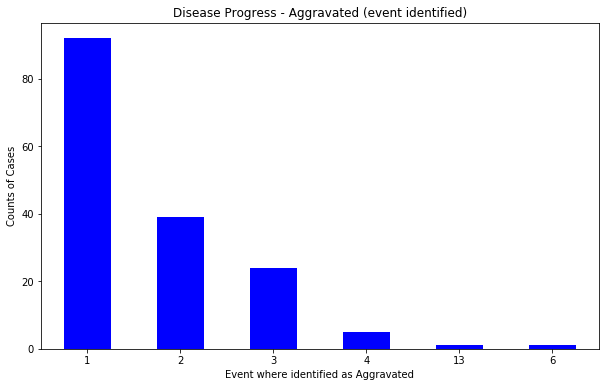

In [204]:
fig, ax = plt.subplots()

#all_aggr.loc[all_aggr.how_disease_progressing=='aggravated'].groupby('case_id').agg({'event_number':'max'})\
all_aggr.loc[all_aggr.how_disease_progressing=='aggravated'].groupby('case_id').agg({'event_number':'max'})['event_number'].value_counts()\
.plot(kind='bar',
     ax = ax,
     legend=False,
     rot=0, 
     title = 'Disease Progress - Aggravated (event identified)',
     figsize=(10, 6),
     color='b')

ax.set_ylabel('Counts of Cases')
ax.set_xlabel('Event where identified as Aggravated')
vals = ax.get_yticks()

In [205]:
sub_aggr = all_aggr.loc[all_aggr.how_disease_progressing=='aggravated'].groupby('case_id', as_index=False).agg({'event_number':'max'})

In [206]:
sub_aggr[sub_aggr['event_number']==4]

,case_id,event_number
22,3107EB54-BBB2-E8D7-B6EF-FA1225B06025,4
58,692A1A57-6ACB-C8DF-ABDC-EDDBC6CC223C,4
140,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,4
147,E90E89C8-A192-6889-AFAD-264AA3C53D76,4
161,FF5AA0F3-3DE8-F906-9425-BA0BB36B5072,4


In [241]:
# set of cases where aggravated is seen in 4th event and capture the progress prior to 'aggravated'
set1 = all_aggr.loc[all_aggr.case_id.isin(sub_aggr[sub_aggr['event_number']==4].case_id)]

In [242]:
set1[set1['event_number'] <= 4].groupby('case_id')['how_disease_progressing'].value_counts().unstack().fillna(0).astype(np.integer)

how_disease_progressing,aggravated,cured,improved
case_id,,,
3107EB54-BBB2-E8D7-B6EF-FA1225B06025,1,0,0
692A1A57-6ACB-C8DF-ABDC-EDDBC6CC223C,1,0,2
DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,1,3,0
E90E89C8-A192-6889-AFAD-264AA3C53D76,1,1,0
FF5AA0F3-3DE8-F906-9425-BA0BB36B5072,1,2,1


In [243]:
# set of cases where aggravated is seen in 3rd event and capture the progress prior to 'aggravated'
set2 = all_aggr.loc[all_aggr.case_id.isin(sub_aggr[sub_aggr['event_number']==3].case_id)]
set2[set2['event_number'] <= 3]

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform,reported_date
6429,19DC94A0-393E-2DE0-BA39-FCAAA2B84094,treatment,1,D8B2C83D-CA1F-55C0-8CEF-4A47F5D2CBF1,3f0fce86e571a1275c338749fb1c6688,623f0465-9eb9-41a2-adac-fd9d0337cf16,401CC651-7594-3260-BB64-709258281769,2017-12-14 18:04:02+00,improved,no,...,yes,NaN,NaN,NaN,NaN,NaN,1.0,ari,NaN,2017-12-14
6430,19DC94A0-393E-2DE0-BA39-FCAAA2B84094,treatment,2,DA304E98-63B0-FFE7-AB1F-AC612F5181D0,3f0fce86e571a1275c338749fb1c6688,623f0465-9eb9-41a2-adac-fd9d0337cf16,401CC651-7594-3260-BB64-709258281769,2017-12-15 17:01:38+00,improved,no,...,yes,NaN,NaN,NaN,NaN,NaN,2.0,ari,NaN,2017-12-15
6431,19DC94A0-393E-2DE0-BA39-FCAAA2B84094,treatment,3,A5D07833-9AD6-9301-96AB-A17371EDC3C0,3f0fce86e571a1275c338749fb1c6688,623f0465-9eb9-41a2-adac-fd9d0337cf16,401CC651-7594-3260-BB64-709258281769,2017-12-16 20:23:07+00,aggravated,NaN,...,yes,NaN,NaN,NaN,NaN,NaN,3.0,referral,NaN,2017-12-16
8089,20688B2A-AAB8-456A-8AE5-0F72E3441AB0,referral,1,4DB338FB-1DC9-140E-BC24-C9E716408314,75feff31-d569-469d-a626-4e8d5fc028c9,f2ac7f9c-b659-4fbf-baf8-6d727c9fc340,ba411dce-41e1-4fdb-ae85-238205d647e7,2017-03-29 09:28:15.4+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-03-29
8090,20688B2A-AAB8-456A-8AE5-0F72E3441AB0,referral,3,87D25A7C-A4C5-254A-AA1C-0E56C45DB8D4,75feff31-d569-469d-a626-4e8d5fc028c9,f2ac7f9c-b659-4fbf-baf8-6d727c9fc340,ba411dce-41e1-4fdb-ae85-238205d647e7,2017-03-31 21:45:16.419+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-03-31
15384,3EB9D7B3-539E-8D8D-A500-C3F96BC199AC,referral,1,EF966AB2-52C0-E1FB-BD55-62CC62AA7430,840b2728-463b-4ff0-983e-f0d24af1d87e,958c8ea7-4d9f-454b-ae91-060829f56b61,554B0D77-841E-E8A8-AD47-7BC1FE2B7634,2017-07-06 11:12:56.418+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-07-06
15385,3EB9D7B3-539E-8D8D-A500-C3F96BC199AC,referral,2,2D2199B5-67E3-6327-A159-385519662B46,840b2728-463b-4ff0-983e-f0d24af1d87e,958c8ea7-4d9f-454b-ae91-060829f56b61,554B0D77-841E-E8A8-AD47-7BC1FE2B7634,2017-07-07 17:44:27.371+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-07-07
15386,3EB9D7B3-539E-8D8D-A500-C3F96BC199AC,referral,3,6BD0CEDC-E421-6C3B-8370-99622DC03FA8,840b2728-463b-4ff0-983e-f0d24af1d87e,958c8ea7-4d9f-454b-ae91-060829f56b61,554B0D77-841E-E8A8-AD47-7BC1FE2B7634,2017-07-08 10:08:33.772+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-07-08
15820,408877B0-E32B-0991-9A97-4AD6AB64C8BE,referral,2,AAEAAFC6-982D-B3D3-AC7F-A045234DE2B1,fda753c1c37ef32fba0138a4c7c52c0b,1c6e4915-44b9-4ba0-bf40-12a03488f3d9,FF920A7F-2A75-72C9-9B62-E7C17FD7B873,2017-08-22 18:20:46.639+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-08-22
15821,408877B0-E32B-0991-9A97-4AD6AB64C8BE,referral,3,988B9B14-88FC-30E6-98A0-DE1C8F66885A,fda753c1c37ef32fba0138a4c7c52c0b,1c6e4915-44b9-4ba0-bf40-12a03488f3d9,FF920A7F-2A75-72C9-9B62-E7C17FD7B873,2017-08-24 09:21:18.222+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-08-24


In [244]:
set2[set2['event_number'] <= 3].groupby('case_id')['how_disease_progressing'].value_counts().unstack().fillna(0).astype(np.integer)

how_disease_progressing,aggravated,cured,improved,no_change
case_id,,,,
19DC94A0-393E-2DE0-BA39-FCAAA2B84094,1,0,2,0
20688B2A-AAB8-456A-8AE5-0F72E3441AB0,1,0,1,0
3EB9D7B3-539E-8D8D-A500-C3F96BC199AC,1,0,2,0
408877B0-E32B-0991-9A97-4AD6AB64C8BE,2,0,0,0
439701EB-6075-6B1A-B033-AB1ED0005026,1,0,1,1
559808BB-FE2D-25C0-8146-ABE507ABC85B,1,0,0,1
5612E7F4-6E37-ED10-8333-1D7CE21481C7,1,1,0,0
63953F1E-69C7-2BD4-84C3-E4325BC1805B,1,0,2,0
7AA5326C-A130-E728-B53E-45C91656790F,1,0,1,0


In [245]:
# set of cases where aggravated is seen in 2nd event and capture the progress prior to 'aggravated'
set3 = all_aggr.loc[all_aggr.case_id.isin(sub_aggr[sub_aggr['event_number']==2].case_id)]
set3[set3['event_number'] <= 2].groupby('case_id')['how_disease_progressing'].value_counts().unstack().fillna(0).astype(np.integer)

how_disease_progressing,aggravated,cured,improved,no_change
case_id,,,,
09DAC086-3230-0AB2-92F4-ED57903FAA38,1,0,1,0
0C2207D8-026E-4E79-B6E7-5D6843030C13,1,1,0,0
108E2394-E83A-BC6D-B733-10450D301939,1,0,0,0
147CBB4F-3F65-8A0D-8A8E-4119283193FD,1,0,1,0
14D8DDEE-B230-E311-90D5-3479C4A408AC,1,0,1,0
183C90BD-0DAC-DAC1-B44D-F667FAEA9553,1,0,0,0
1C2A9564-9BCA-4DC5-ABBE-0BF7C613D2D5,1,0,1,0
270535B0-1770-85F4-B18C-EE2B7B7BB583,1,0,1,0
2D0B1DB0-3DC3-A6E2-B206-871080BE6093,1,0,1,0


In [246]:
set3_events = set3[set3['event_number'] <= 2].groupby('case_id')['how_disease_progressing'].value_counts().unstack().fillna(0).astype(np.integer)

In [247]:
set3_events

how_disease_progressing,aggravated,cured,improved,no_change
case_id,,,,
09DAC086-3230-0AB2-92F4-ED57903FAA38,1,0,1,0
0C2207D8-026E-4E79-B6E7-5D6843030C13,1,1,0,0
108E2394-E83A-BC6D-B733-10450D301939,1,0,0,0
147CBB4F-3F65-8A0D-8A8E-4119283193FD,1,0,1,0
14D8DDEE-B230-E311-90D5-3479C4A408AC,1,0,1,0
183C90BD-0DAC-DAC1-B44D-F667FAEA9553,1,0,0,0
1C2A9564-9BCA-4DC5-ABBE-0BF7C613D2D5,1,0,1,0
270535B0-1770-85F4-B18C-EE2B7B7BB583,1,0,1,0
2D0B1DB0-3DC3-A6E2-B206-871080BE6093,1,0,1,0


In [251]:
set3_events.reset_index('case_id', inplace=True)
#set3_events[['cured', 'improved', 'no_change', 'case_id']].groupby(['cured', 'improved', 'no_change']).agg({'case_id':'count'})

In [250]:
set3_events[['cured', 'improved', 'no_change', 'aggravated', 'case_id']].groupby(['cured', 'improved', 'no_change', 'aggravated']).agg({'case_id':'count'})

case_id
cured improved no_change aggravated         
0     0        0         1                 8
               1         1                 4
      1        0         1                21
1     0        0         1                 6

In [215]:
one_followup = followup.groupby(['case_id', 'event_type', 'how_disease_progressing'], as_index=False).agg({'event_number':'count', 'reported':'min'})

In [216]:
one_followup[one_followup['event_number'] == 1]['how_disease_progressing'].value_counts()

improved      12957
cured         12150
no_change       552
aggravated      159
Name: how_disease_progressing, dtype: int64

In [217]:
#tmt[tmt['case_id'] == 'FFE090E5-DEBE-839C-9CB4-BFB48C9D762F']

In [218]:
two_followup = followup.groupby(['case_id', 'event_type', 'how_disease_progressing'], as_index=False).agg({'event_number':'count', 'reported':'min'})
two_followup[one_followup['event_number'] == 2]['how_disease_progressing'].value_counts()

improved      7802
cured         2787
no_change       25
aggravated       3
Name: how_disease_progressing, dtype: int64

In [219]:
followup[followup['case_id'] == 'DE324C10-1535-A4D2-BD49-1DBE7AABBAFC']
         #EB06E202-85A4-1442-94CB-EEE3DAC2958F']

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform,reported_date
54566,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,treatment,1,7804799D-0F5C-CC98-ACB4-99F471863474,4cafc8da-c840-42a7-b2f8-7ecaaf948a00,f675317a-8e0e-4b51-99df-f30e152f8c82,304BEA3D-3672-5F8B-98ED-C591309279DE,2017-11-22 12:32:04+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,referral,NaN,2017-11-22
54567,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,referral,2,606DC75A-C1C5-036A-8F6A-6111D279D032,4cafc8da-c840-42a7-b2f8-7ecaaf948a00,f675317a-8e0e-4b51-99df-f30e152f8c82,304BEA3D-3672-5F8B-98ED-C591309279DE,2017-11-23 18:18:52.318+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-11-23
54568,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,referral,3,CD9EF73B-3903-8E89-A7D5-E0AC85D48FFA,4cafc8da-c840-42a7-b2f8-7ecaaf948a00,f675317a-8e0e-4b51-99df-f30e152f8c82,304BEA3D-3672-5F8B-98ED-C591309279DE,2017-11-24 19:18:45.817+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-11-24
54569,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,referral,4,36E82F20-4A6E-BEA6-A116-3DF5E95B3F33,4cafc8da-c840-42a7-b2f8-7ecaaf948a00,f675317a-8e0e-4b51-99df-f30e152f8c82,304BEA3D-3672-5F8B-98ED-C591309279DE,2017-11-25 18:18:51.62+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up,2017-11-25


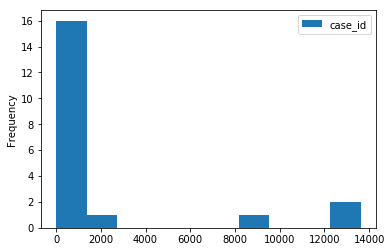

In [220]:
fig, ax = plt.subplots()

followup[followup['event_type']=='referral'].groupby('event_number')['case_id'].count()\
.plot(kind='hist',
     ax = ax,
     legend=True)

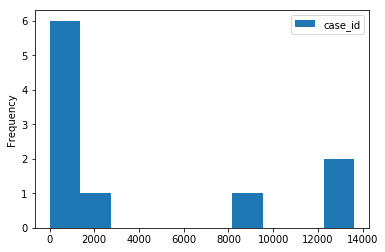

In [221]:
fig, ax = plt.subplots()

followup[followup['event_type']=='referral'].groupby('event_number')['case_id'].count().head(10)\
.plot(kind='hist',
     ax = ax,
     legend=True)

In [222]:
followup[followup['event_type']=='referral'].groupby('event_number')['case_id'].count().head(10)

event_number
1     13249
2     13618
3      9009
4      2187
5       169
6        74
7        37
8        20
9        14
10       12
Name: case_id, dtype: int64

In [240]:
followup[followup['event_type']=='referral'].groupby('event_number')['case_id'].count().tail(10)

event_number
11    2
12    6
13    5
14    5
16    1
17    1
18    1
20    1
50    1
51    1
Name: case_id, dtype: int64

In [53]:
followup[followup['event_number']==51]

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
46102,B00607B6-E726-0651-8169-6EFBE514A943,referral,51,BED099BD-7534-F6F8-BEBB-56E212B82F87,c92915b9-fc75-4c4c-909f-3286c2101428,f1f1a37f-14f1-418c-b064-2a53e643218f,b67cd1d8-2965-4901-9d30-b7715b8827c6,2017-07-21 11:45:01.375+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,close_out


In [225]:
# number of patients with malaria, diarrhea or ari
len(tmt[(tmt['treat_for_malaria'] == True) | (tmt['treat_for_diarrhea'] == True) | (tmt['treat_for_ari'] == True)])

23561

In [226]:
tmt.groupby('how_disease_progressing').agg({'treat_for_malaria':'sum', 'treat_for_diarrhea':'sum', 'treat_for_ari':'sum'})

,treat_for_malaria,treat_for_diarrhea,treat_for_ari
how_disease_progressing,,,
aggravated,20.0,31.0,49.0
cured,1107.0,2880.0,4271.0
improved,2952.0,2689.0,11210.0
no_change,47.0,73.0,123.0


In [252]:
tmt = tmt[tmt['close_out']==False]
tmt.groupby('how_disease_progressing').sum()

,event_number,treat_for_diarrhea,treat_for_malaria,treat_for_ari,under_observation,child_temperature,child_temperature_retake,respiration_rate,close_out,follow_up_count,month
how_disease_progressing,,,,,,,,,,,
aggravated,57,19.0,14.0,24.0,0.0,1736.90,83.0,1183.0,0.0,71,200
cured,14777,2636.0,1089.0,4205.0,0.0,274330.70,4353.8,162638.0,0.0,18124,41800
improved,22600,2302.0,2876.0,11001.0,0.0,531644.16,8101.9,452290.0,0.0,26939,78599
no_change,154,40.0,30.0,80.0,0.0,4936.40,159.1,3576.0,0.0,199,770


In [253]:
tmt.head()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type,date_reported,month,disease
0,00159146-3099-3ECF-9218-DAF176D00A12,1,2D09AC5E-6A1D-02C9-844A-7A3CCC59B236,db91e797f2ce030419456e90ab7914d5,8bc01540-57c3-4cea-9b7d-c4922098a59c,356559E4-BA74-411C-BFF4-AC4DF047AEBF,2017-09-16 19:10:38+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,4,ari,2017-09-16 19:10:38,9,ari
1,001F9F88-1793-3401-84D8-E34D25A43002,1,86D3B6D7-3584-0929-9930-263185102CE3,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-01 09:47:26+00,follow_up,False,True,...,no,False,NaN,NaN,NaN,1,malaria,2017-06-01 09:47:26,6,Malaria
2,001F9F88-1793-3401-84D8-E34D25A43002,2,D781E302-EBCC-83F5-AE76-C91E6CD7E9FF,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-02 13:57:10+00,follow_up,False,True,...,no,False,NaN,NaN,NaN,2,malaria,2017-06-02 13:57:10,6,Malaria
3,001F9F88-1793-3401-84D8-E34D25A43002,3,9EA28B2C-9776-AC04-A77C-A9CD8DC504A3,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-03 10:39:17+00,follow_up,False,True,...,no,False,NaN,NaN,NaN,3,malaria,2017-06-03 10:39:17,6,Malaria
4,00249697-479E-93E4-AFFE-47F095816F20,1,E40A5130-2FAB-508C-B6A0-7BD4DA08321B,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,97410838-dc38-4fde-a48c-57d901dcfdca,2017-03-04 13:47:21+00,follow_up,False,True,...,no,False,NaN,NaN,NaN,2,malaria,2017-03-04 13:47:21,3,Malaria


In [254]:
tmt[tmt['how_disease_progressing'] == 'aggravated'].groupby('patient_id').head()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type,date_reported,month,disease
546,05D06A0A-FDE0-51F1-BDAA-38E5E1A29175,1,249B733C-7B7D-C690-9FB7-0AE2B57E3584,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,a36b00d3-eef5-4658-91be-2ab62ca773f0,2017-04-04 19:55:44+00,follow_up,True,False,...,NaN,False,NaN,NaN,NaN,1,referral,2017-04-04 19:55:44,4,Diarrhea
1904,147CBB4F-3F65-8A0D-8A8E-4119283193FD,2,E304B0A2-1D89-F170-8A08-A659169A9F98,840b2728-463b-4ff0-983e-f0d24af1d87e,958c8ea7-4d9f-454b-ae91-060829f56b61,0ccaf458-bb6b-40c6-bc7c-0129ead94fe9,2017-02-08 10:03:03+00,follow_up,False,True,...,NaN,False,NaN,NaN,NaN,2,referral,2017-02-08 10:03:03,2,Malaria
2266,183C90BD-0DAC-DAC1-B44D-F667FAEA9553,1,FD7674E1-677C-2B73-A3E7-2E054E65E05C,a4119d4c-664e-49cf-a596-aa25981ebf8d,a7cc7776-9da8-4ea6-8a8d-3c23aa6c9055,d9775082-d5fa-4f70-9c69-58f5b32c24b3,2017-04-05 16:27:33+00,follow_up,False,False,...,NaN,False,NaN,NaN,NaN,2,referral,2017-04-05 16:27:33,4,ari
2434,19DC94A0-393E-2DE0-BA39-FCAAA2B84094,3,A5D07833-9AD6-9301-96AB-A17371EDC3C0,3f0fce86e571a1275c338749fb1c6688,623f0465-9eb9-41a2-adac-fd9d0337cf16,401CC651-7594-3260-BB64-709258281769,2017-12-16 20:23:07+00,follow_up,False,False,...,NaN,False,NaN,NaN,NaN,3,referral,2017-12-16 20:23:07,12,ari
3406,23A66395-D099-B16C-B191-D387F1B65FAA,1,20756DA6-E79F-9C3B-A0B1-4EA59F6468D1,0b39d72a-1750-436b-a00c-26671869a6ee,a4368a6b-18b8-472b-8866-0b0db5a2a0a2,a581121e-018f-4797-9c53-9eb1adbcf93c,2017-03-19 10:08:25+00,follow_up,False,True,...,NaN,False,NaN,NaN,NaN,2,referral,2017-03-19 10:08:25,3,Malaria
3855,298AF4D9-B6C0-7FA8-B89B-968CB857AA93,1,EED15A5F-1D8C-753E-929F-429801B3EB59,320b52f8-7bd3-46af-a3e4-24c040be4612,dac29b40-cb6e-4231-849d-2590e81c6c4b,0fa7917b-867b-4e71-aea8-e2e61fa94f0a,2017-03-12 12:01:08+00,follow_up,False,True,...,NaN,False,NaN,NaN,NaN,1,referral,2017-03-12 12:01:08,3,Malaria
4661,3252B126-0A4F-78A5-BCEF-A65D236D601C,2,6EC35CCA-A58E-51BE-ABA9-33915D800C12,26ef4c63-e601-4678-8d2d-ffd890d3f72e,275caf3f-5486-4688-ad3d-944e856c87ae,950ea4dc-21a8-46cc-9f75-b82daacc2869,2017-03-04 14:39:00+00,follow_up,False,True,...,NaN,False,NaN,NaN,NaN,2,referral,2017-03-04 14:39:00,3,Malaria
4697,32CE48B9-69F3-E90D-B4FC-C7C55359A932,1,943EF64A-A4AC-3F8F-A115-984F9F72771E,654c6596-7237-4f3c-a1ce-af3f46adb935,25e31603-9243-4e99-8312-356f19235d9d,9976b3ad-8e3e-4cdd-ada6-e52957ed4905,2017-06-13 09:16:27+00,follow_up,True,False,...,NaN,False,NaN,NaN,NaN,1,referral,2017-06-13 09:16:27,6,Diarrhea
5453,3B7B3F62-B4DF-2A27-B398-9D22B456E053,1,A7675647-A21D-FABC-8F87-C2809CC3E07A,6dfa794a-542f-4162-b052-81264db24837,8bc36cc0-d08e-4451-93c4-df3c04df746a,a1daeef6-0cd7-4c4e-b6bc-1bd44dc4c204,2017-03-07 09:17:37+00,follow_up,True,False,...,NaN,False,NaN,NaN,NaN,1,referral,2017-03-07 09:17:37,3,Diarrhea
5770,3F0671E0-559A-4F69-BA76-7F4935E835DE,1,BA0D8BAD-C0D2-9B6C-BA89-5209C92C4539,320b52f8-7bd3-46af-a3e4-24c040be4612,dac29b40-cb6e-4231-849d-2590e81c6c4b,ac617ebb-00d1-48cb-a3ec-f61c4b35cd40,2017-03-13 17:04:08+00,follow_up,True,True,...,NaN,False,NaN,NaN,NaN,1,referral,2017-03-13 17:04:08,3,Malaria


In [255]:
# Distribution of cases per patient.
# List of patients with cases whose reporting date are within a month of one another.
pt_case_dist = tmt.groupby('patient_id').count()
pt_case_dist

,case_id,event_number,event_id,chw_id,chw_parent_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,treat_for_ari,...,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type,date_reported,month,disease
patient_id,,,,,,,,,,,,,,,,,,,,,
0017213b-948d-4412-a045-dd0f96ca597a,5,5,5,5,5,5,5,5,5,5,...,5,5,0,0,0,5,5,5,5,5
00191d38-092f-4535-8645-e945fdbba710,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,1,1
002474b9-b444-481a-beed-eeba61a17cc9,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,1,1
003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,4,4,4,4,4,4,4,4,4,4,...,4,4,0,0,0,4,4,4,4,4
003BA405-4DDC-1187-86AE-5AF6A9D4E838,2,2,2,2,2,2,2,2,2,2,...,2,2,0,0,0,2,2,2,2,2
004A8C5C-7FF0-8001-9660-C44FC09EE1B1,4,4,4,4,4,4,4,4,4,4,...,4,4,0,0,0,4,4,4,4,4
00694a4d-52ae-488a-bbf8-016173ffbd4a,8,8,8,8,8,8,8,8,8,8,...,8,8,0,0,0,8,8,8,8,8
006d300a-ed53-4ebc-b1c0-9180f356edd2,3,3,3,3,3,3,3,3,3,3,...,3,3,0,0,0,3,3,3,3,3
007112cb-6ec1-4e69-9a12-50b1e9482cee,7,7,7,7,7,7,7,7,7,7,...,7,7,0,0,0,7,7,7,7,7


<module 'matplotlib.pyplot' from 'C:\\Users\\sudha\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1080x720 with 0 Axes>

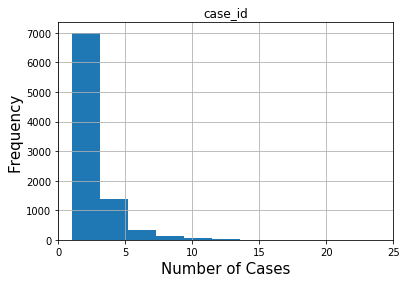

In [256]:
%matplotlib inline  
fig = plt.figure(figsize=(15,10))
pt_case_dist.hist(column="case_id")
plt.xlabel("Number of Cases", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlim([0.0,25.0])
plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238424A5748>]],
      dtype=object)

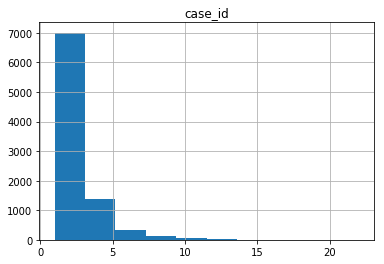

In [257]:
pt_case_dist.hist(column = "case_id")

In [258]:
(pt_case_dist['event_id'] <= 5).sum()

8381

In [259]:
pt_case_dist['event_id'].sum()

22058

In [260]:
tmt.groupby(['patient_id'])['reported'].count()
tmt['date_reported'] = pd.to_datetime(tmt['reported'], infer_datetime_format = True)

In [261]:
tmt['month'] = tmt['date_reported'].dt.month
def get_disease(row):
    if row['treat_for_malaria'] == True:
        return 'Malaria'
    if row['treat_for_diarrhea'] == True:
        return 'Diarrhea'
    if row['treat_for_ari'] == True:
        return 'ari'
    else:
        return 'None'
    

tmt['disease'] = tmt.apply(lambda row: get_disease(row), axis=1)
#tmt['month']

In [262]:
tmt_in_month = tmt.groupby(['month', 'patient_id', 'follow_up_type'])['date_reported'].count() 

In [263]:
tmt[tmt['patient_id'] == '0da916df-49b9-43b8-a65b-f323a58ea164']

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type,date_reported,month,disease
14764,A1810BAF-7465-2F53-965F-9A1B3A2AF756,1,1B19E01F-CB6E-1B34-B5A4-443D0871F34A,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-03-17 11:54:06+00,follow_up,False,True,...,no,False,NaN,NaN,NaN,1,malaria,2017-03-17 11:54:06,3,Malaria
14765,A1810BAF-7465-2F53-965F-9A1B3A2AF756,2,5620F971-B311-53F7-A8BA-FB235B1CB0B0,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-03-20 10:07:22+00,follow_up,False,True,...,yes,False,NaN,NaN,NaN,2,referral,2017-03-20 10:07:22,3,Malaria
20206,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,1,90A3162F-308B-8D1B-BB54-7B9E509FBBF1,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-14 12:19:32+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,1,ari,2017-12-14 12:19:32,12,ari
20207,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,2,BE686B5F-8962-2565-A7B3-B562734403C7,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-15 13:06:52+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,2,ari,2017-12-15 13:06:52,12,ari
20208,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,3,4973783F-9664-74B1-8466-8EADB5C2ADCA,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-16 15:04:32+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,3,ari,2017-12-16 15:04:32,12,ari
20209,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,4,444DEDAE-E947-8E92-BA96-D620B6C591B1,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-18 12:29:53+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,4,ari,2017-12-18 12:29:53,12,ari


In [264]:
tmt_in_month.head()

month  patient_id                            follow_up_type
1      002474b9-b444-481a-beed-eeba61a17cc9  ari               1
       00694a4d-52ae-488a-bbf8-016173ffbd4a  referral          1
       007112cb-6ec1-4e69-9a12-50b1e9482cee  ari               3
       0071C1B3-16C0-864C-A9B5-F0B48CE3666D  ari               3
       0086AEBD-27AE-EFFE-BEAD-A62ADE96416A  ari               2
Name: date_reported, dtype: int64

In [265]:
tmt_in_month.to_csv('treatment_in_month_timeframe.csv')

In [266]:
tmt.groupby(['month', 'disease']).agg(("event_id"))

In [267]:
grouped = tmt.groupby(['patient_id', 'disease']).agg({"date_reported": [min, max]})

In [268]:
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
#grouped.sort_values(by=['patient_id'])
grouped.head()

,,date_reported_min,date_reported_max
patient_id,disease,,
0017213b-948d-4412-a045-dd0f96ca597a,Malaria,2017-03-04 20:07:07,2017-03-29 12:26:03
00191d38-092f-4535-8645-e945fdbba710,ari,2017-03-03 18:59:54,2017-03-03 18:59:54
002474b9-b444-481a-beed-eeba61a17cc9,ari,2018-01-24 09:59:37,2018-01-24 09:59:37
003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,ari,2017-04-23 20:35:48,2017-04-27 17:44:32
003BA405-4DDC-1187-86AE-5AF6A9D4E838,ari,2017-10-30 16:42:42,2017-11-02 07:47:23


In [272]:
grouped.reset_index(inplace=True)

In [273]:
def first_second(df):
    return df.ix[[0, -1]]

#grouped2 = tmt.groupby(['patient_id', 'disease']).agg({"date_reported": [min, max, 'first', 'last']})
grouped2 = tmt.groupby(['patient_id', 'disease'], as_index=False).agg({"date_reported": [min, max, 'first', 'last']})

#grouped2 = tmt.groupby(['patient_id']).apply(first_second(tmt))
grouped2.head()

patient_id  disease       date_reported  \
                                                                 min   
0  0017213b-948d-4412-a045-dd0f96ca597a  Malaria 2017-03-04 20:07:07   
1  00191d38-092f-4535-8645-e945fdbba710      ari 2017-03-03 18:59:54   
2  002474b9-b444-481a-beed-eeba61a17cc9      ari 2018-01-24 09:59:37   
3  003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb      ari 2017-04-23 20:35:48   
4  003BA405-4DDC-1187-86AE-5AF6A9D4E838      ari 2017-10-30 16:42:42   

                                                               
                  max               first                last  
0 2017-03-29 12:26:03 2017-03-04 20:07:07 2017-03-29 12:26:03  
1 2017-03-03 18:59:54 2017-03-03 18:59:54 2017-03-03 18:59:54  
2 2018-01-24 09:59:37 2018-01-24 09:59:37 2018-01-24 09:59:37  
3 2017-04-27 17:44:32 2017-04-23 20:35:48 2017-04-27 17:44:32  
4 2017-11-02 07:47:23 2017-10-30 16:42:42 2017-11-02 07:47:23

In [274]:
grouped2.columns.values

array([('patient_id', ''), ('disease', ''), ('date_reported', 'min'),
       ('date_reported', 'max'), ('date_reported', 'first'),
       ('date_reported', 'last')], dtype=object)

In [275]:
grouped2.columns = ["_".join(x) for x in grouped2.columns.ravel()]
grouped2.rename(columns={'patient_id_' : 'patient_id', 'disease_' : 'disease'}, inplace=True)
grouped2.sort_values(['patient_id', 'disease'], ascending=[True, True])
new = grouped2.head(20)

In [276]:
list(new.columns.values)

['patient_id',
 'disease',
 'date_reported_min',
 'date_reported_max',
 'date_reported_first',
 'date_reported_last']

In [277]:
new

,patient_id,disease,date_reported_min,date_reported_max,date_reported_first,date_reported_last
0,0017213b-948d-4412-a045-dd0f96ca597a,Malaria,2017-03-04 20:07:07,2017-03-29 12:26:03,2017-03-04 20:07:07,2017-03-29 12:26:03
1,00191d38-092f-4535-8645-e945fdbba710,ari,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54
2,002474b9-b444-481a-beed-eeba61a17cc9,ari,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37
3,003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,ari,2017-04-23 20:35:48,2017-04-27 17:44:32,2017-04-23 20:35:48,2017-04-27 17:44:32
4,003BA405-4DDC-1187-86AE-5AF6A9D4E838,ari,2017-10-30 16:42:42,2017-11-02 07:47:23,2017-10-30 16:42:42,2017-11-02 07:47:23
5,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,Diarrhea,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54
6,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,ari,2017-04-17 00:48:32,2017-04-20 09:55:19,2017-04-17 00:48:32,2017-04-20 09:55:19
7,00694a4d-52ae-488a-bbf8-016173ffbd4a,Diarrhea,2017-05-16 10:55:18,2018-01-13 12:17:17,2017-05-16 10:55:18,2017-12-13 19:21:37
8,00694a4d-52ae-488a-bbf8-016173ffbd4a,ari,2017-03-09 08:30:02,2017-07-16 14:28:56,2017-03-09 08:30:02,2017-07-16 14:28:56
9,006d300a-ed53-4ebc-b1c0-9180f356edd2,Diarrhea,2017-07-10 10:56:28,2018-02-06 16:03:36,2018-02-06 16:03:36,2017-07-10 10:56:28


In [278]:
grouped2['num_days'] = abs((grouped2.date_reported_last - grouped2.date_reported_first).dt.days)


In [279]:
grouped2.head(20)

,patient_id,disease,date_reported_min,date_reported_max,date_reported_first,date_reported_last,num_days
0,0017213b-948d-4412-a045-dd0f96ca597a,Malaria,2017-03-04 20:07:07,2017-03-29 12:26:03,2017-03-04 20:07:07,2017-03-29 12:26:03,24
1,00191d38-092f-4535-8645-e945fdbba710,ari,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54,0
2,002474b9-b444-481a-beed-eeba61a17cc9,ari,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37,0
3,003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,ari,2017-04-23 20:35:48,2017-04-27 17:44:32,2017-04-23 20:35:48,2017-04-27 17:44:32,3
4,003BA405-4DDC-1187-86AE-5AF6A9D4E838,ari,2017-10-30 16:42:42,2017-11-02 07:47:23,2017-10-30 16:42:42,2017-11-02 07:47:23,2
5,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,Diarrhea,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54,0
6,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,ari,2017-04-17 00:48:32,2017-04-20 09:55:19,2017-04-17 00:48:32,2017-04-20 09:55:19,3
7,00694a4d-52ae-488a-bbf8-016173ffbd4a,Diarrhea,2017-05-16 10:55:18,2018-01-13 12:17:17,2017-05-16 10:55:18,2017-12-13 19:21:37,211
8,00694a4d-52ae-488a-bbf8-016173ffbd4a,ari,2017-03-09 08:30:02,2017-07-16 14:28:56,2017-03-09 08:30:02,2017-07-16 14:28:56,129
9,006d300a-ed53-4ebc-b1c0-9180f356edd2,Diarrhea,2017-07-10 10:56:28,2018-02-06 16:03:36,2018-02-06 16:03:36,2017-07-10 10:56:28,212


In [283]:
import seaborn as sns

C:\Users\sudha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


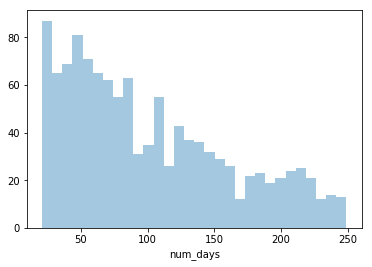

In [299]:
sns.distplot(grouped2[(grouped2['num_days'] > 20) & (grouped2['num_days'] < 250)]['num_days'], kde=False, bins=30)

In [281]:
grouped2.to_excel('Datasets/Patient_Multiple_Cases_Span.xlsx')